<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/vision/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

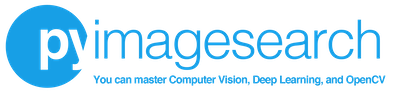

# Gradient descent with Python
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Gradient descent with Python](https://www.pyimagesearch.com/2016/10/10/gradient-descent-with-python/) blog post published on 2016-10-10.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/gradient-descent/gradient-descent.zip
!unzip -qq gradient-descent.zip
%cd gradient-descent

--2023-05-13 01:52:48--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/gradient-descent/gradient-descent.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.233.193, 52.92.249.98, 52.92.132.178, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.233.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949 (1.9K) [application/zip]
Saving to: ‘gradient-descent.zip’

gradient-descent.zi 100%[===================>]   1.90K  --.-KB/s    in 0s      

2023-05-13 01:52:48 (21.8 MB/s) - ‘gradient-descent.zip’ saved [1949/1949]

/content/gradient-descent


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Implementing gradient descent with Python


In [3]:
def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input `x` has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))

	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1

	# return the predictions
	return preds

In [4]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-e", "--epochs", type=float, default=100,
# 	help="# of epochs")
# ap.add_argument("-a", "--alpha", type=float, default=0.01,
# 	help="learning rate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"epochs": 100,
	"alpha": 0.01
}

In [5]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [6]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# take the dot product between our features "X" and the weight
	# matrix "W", then pass this value through our sigmoid activation
	# function, thereby giving us our predictions on the dataset
	preds = sigmoid_activation(trainX.dot(W))

	# now that we have our predictions, we need to determine the
	# "error", which is the difference between our predictions and
	# the true values
	error = preds - trainY
	loss = np.sum(error ** 2)
	losses.append(loss)

	# the gradient descent update is the dot product between our
	# (1) features and (2) the error of the sigmoid derivative of
	# our predictions
	d = error * sigmoid_deriv(preds)
	gradient = trainX.T.dot(d)

	# in the update stage, all we need to do is "nudge" the weight
	# matrix in the negative direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a set
	# of "more optimal" parameters
	W += -args["alpha"] * gradient

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

[INFO] epoch=1, loss=222.9564058
[INFO] epoch=5, loss=4.1696034
[INFO] epoch=10, loss=1.6949819
[INFO] epoch=15, loss=0.9545422
[INFO] epoch=20, loss=0.6745322
[INFO] epoch=25, loss=0.5377582
[INFO] epoch=30, loss=0.4607610
[INFO] epoch=35, loss=0.4143343
[INFO] epoch=40, loss=0.3851918
[INFO] epoch=45, loss=0.3659771
[INFO] epoch=50, loss=0.3522963
[INFO] epoch=55, loss=0.3416095
[INFO] epoch=60, loss=0.3325575
[INFO] epoch=65, loss=0.3244622
[INFO] epoch=70, loss=0.3169962
[INFO] epoch=75, loss=0.3099997
[INFO] epoch=80, loss=0.3033883
[INFO] epoch=85, loss=0.2971121
[INFO] epoch=90, loss=0.2911371
[INFO] epoch=95, loss=0.2854374
[INFO] epoch=100, loss=0.2799916


[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



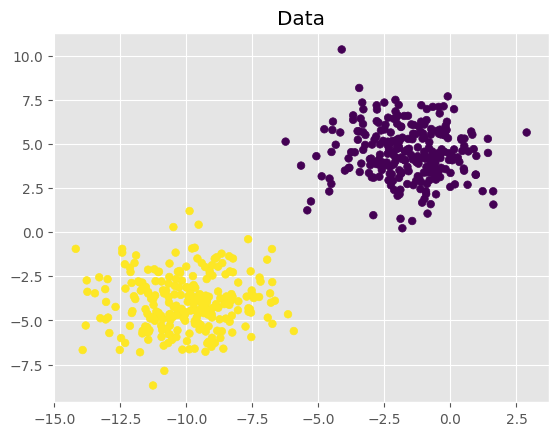

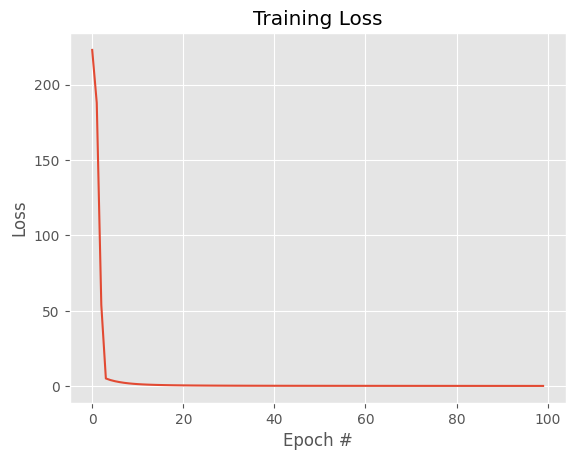

In [7]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, args["epochs"]), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Gradient descent with Python*](https://www.pyimagesearch.com/2016/10/10/gradient-descent-with-python/) blog post published on 2016-10-10.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```